# 6.함수(Function)

## 다양한 분야에서 사용되는 함수

### [예제] 경제학: 수요 함수
- 경제학에서 함수는 다양한 경제 변수 간의 관계를 설명하는 데 사용됨
- 수요-공급 함수는 가격 $P$에 따라 수요량 $Q_d$, 공급량 $Q_s$이 변하는 관계를 나타냄
    - 수요함수: $Q_d$  = $a$ - $bP$  (a는 최대 수요량, b는 가격 변화에 따른 수요 변화 비율)
    - 공급함수: $Q_s$  = $c$ - $dP$ (c는 최소 공급량, d는 가격 변화에 따른 공급 변화 비율)
    - 시장균형: $Q_d$  = $Q_s$ (수요량과 공급량이 일치하는 지점에서의 가격과 수량이 시장 균형점이 됨)

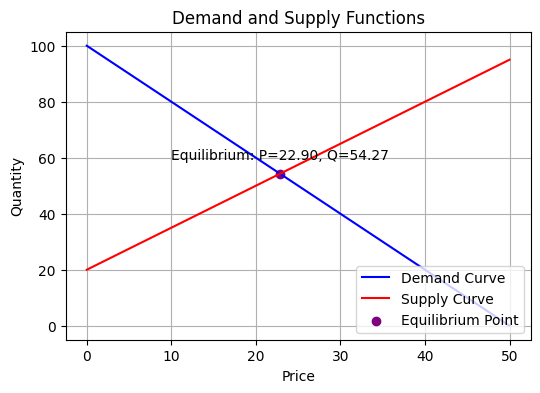

In [18]:
import matplotlib.pyplot as plt

def demand_function(price):
    """수요 함수: 가격이 증가할수록 수요량이 감소합니다."""
    a = 100  # 최대 수요량
    b = 2    # 가격 변화에 따른 수요 변화 비율
    return a - b * price

def supply_function(price):
    """공급 함수: 가격이 증가할수록 공급량이 증가합니다."""
    c = 20  # 최소 공급량
    d = 1.5 # 가격 변화에 따른 공급 변화 비율
    return c + d * price

# 가격이 0에서 50까지 변화할 때 수요량과 공급량을 계산
prices = [p / 10 for p in range(0, 501)]  # 더 세밀한 가격 구간 사용
demand_quantities = [demand_function(price) for price in prices]
supply_quantities = [supply_function(price) for price in prices]

# 균형점 찾기: 수요량과 공급량의 차이가 가장 작은 지점 찾기
min_difference = float('inf')
equilibrium_price = None
equilibrium_quantity = None

for price, demand, supply in zip(prices, demand_quantities, supply_quantities):
    difference = abs(demand - supply)
    if difference < min_difference:
        min_difference = difference
        equilibrium_price = price
        equilibrium_quantity = (demand + supply) / 2  # 수요량과 공급량의 평균을 사용

# 그래프 시각화
plt.figure(figsize=(6, 4))
plt.plot(prices, demand_quantities, label='Demand Curve', color='b')
plt.plot(prices, supply_quantities, label='Supply Curve', color='r')

# 균형점 표시
if equilibrium_price is not None and equilibrium_quantity is not None:
    plt.scatter(equilibrium_price, equilibrium_quantity, color='purple', label='Equilibrium Point')
    plt.annotate(f'Equilibrium: P={equilibrium_price:.2f}, Q={equilibrium_quantity:.2f}',
                 (equilibrium_price, equilibrium_quantity), textcoords="offset points", xytext=(0,10), ha='center')

# 그래프 설정
plt.title('Demand and Supply Functions')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid()
plt.legend(loc='lower right')
plt.show()


### [예제] 물리학: 운동 방정식
- 물체의 위치를 시간의 함수로 표현
- 운동 방정식 (Equation of Motion): 물체의 위치 $s$는 시간 $t$, 초기 속도, 초기 위치, 그리고 중력 가속도와의 관계로 표현됨
- 이 식은 물체가 자유 낙하할 때의 위치를 나타내며, 중력의 영향을 고려함
    - $s(t)$ = $s_0$ + $v_0$$t$ - $\frac{1}{2}gt^2 $
    - $s_0$ : 초기 위치
    - $v_0$ : 초기 속도
    - $g$ : 중력 가속도 (9.81 $m/s^2$)
    - $t$ : 시간

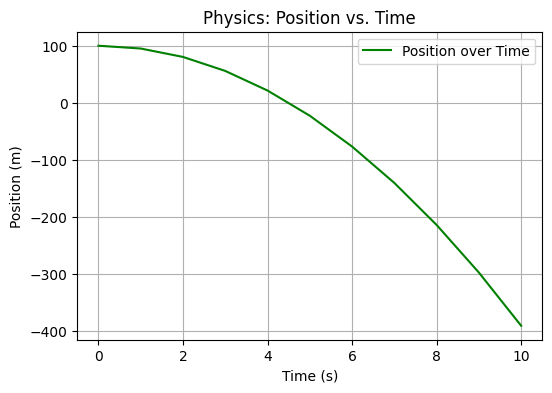

In [8]:
def position_function(time, initial_velocity, initial_position):
    """운동 방정식: 물체의 위치를 시간에 대한 함수로 나타냅니다."""
    g = 9.81  # 중력 가속도 (m/s^2)
    return initial_position + initial_velocity * time - 0.5 * g * time**2

# 초기 속도와 초기 위치 설정
initial_velocity = 0  # 초기 속도 (m/s)
initial_position = 100  # 초기 위치 (m)

# 시간 0에서 10초까지의 위치 계산
times = [t for t in range(0, 11)]
positions = [position_function(t, initial_velocity, initial_position) for t in times]

# 그래프 시각화
plt.figure(figsize=(6, 4))
plt.plot(times, positions, label='Position over Time', color='g')
plt.title('Physics: Position vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.legend()
plt.show()


### [예제] 생물학: 약물 농도 모델링 (약동학)
- 약물 농도 모델링 (Pharmacokinetics Model): 약물의 농도 $C$는 시간 $t$, 초기 농도 $C_0$, 그리고 소실 속도 $k$k에 따라 지수적으로 감소함
- 이 식은 약물의 체내 농도가 시간 경과에 따라 지수적으로 감소하는 것을 나타
    - $C(t)$ =  $C_0$$e^{-kt}$
    - $C_0$ : 초기 약물 농도
    - $k$ : 약물의 소실 속도 상수 (1/시간)
    - $e$ : 자연 상수 (약 2.718)



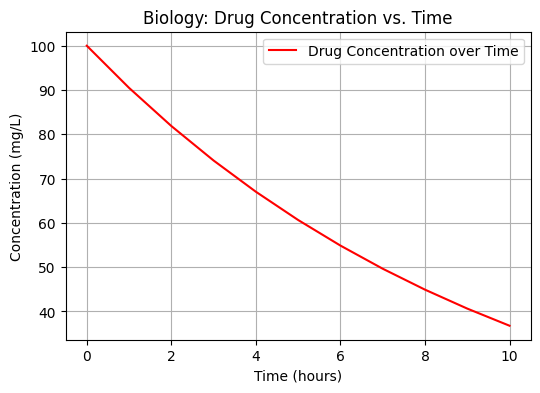

In [10]:
import math

def drug_concentration(time, initial_concentration, elimination_rate):
    """약물 농도 모델링: 시간에 따른 약물 농도의 변화를 나타냅니다."""
    return initial_concentration * math.exp(-elimination_rate * time)

# 초기 농도와 소실 속도 설정
initial_concentration = 100  # 초기 약물 농도 (mg/L)
elimination_rate = 0.1       # 소실 속도 상수 (1/hour)

# 시간 0에서 10시간까지 약물 농도 계산
times = [t for t in range(0, 11)]
concentrations = [drug_concentration(t, initial_concentration, elimination_rate) for t in times]

# 그래프 시각화
plt.figure(figsize=(6, 4))
plt.plot(times, concentrations, label='Drug Concentration over Time', color='r')
plt.title('Biology: Drug Concentration vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.grid()
plt.legend()
plt.show()


## 함수의 응용 :

### [예제] 자동차의 제동거리 계산
- $d = \frac{v^2}{2 \mu g}$
    - d : 제동거리(미터)
    - $v$는 초기 속도 (m/s)
    - 𝜇 : 도로와 타이어 사이의 마찰계수
    - 𝑔 : 중력 가속도 (9.81 𝑚/$s^2$)

In [ ]:
def braking_distance(speed, friction_coefficient):
    """
    자동차의 제동거리를 계산하는 함수.

    Parameters:
        speed (float): 초기 속도 (km/h)
        friction_coefficient (float): 도로와 타이어 사이의 마찰계수
        - 건조한 아스팔트/콘크리트 도로 : 0.7 - 0.9
        - 젖은 아스팔트/콘크리트 도로 : 0.4 - 0.6
        - 눈이 쌓인 도로 : 0.2 - 0.3
        - 얼어붙은 도로 (빙판길) : 0.1 - 0.2
        - 비포장 도로 (자갈길, 흙길) :  0.3 - 0.5
        - 젖은 잔디 : 0.25 - 0.4

    Returns:
        float: 제동거리 (미터)
    """
    # 속도를 m/s로 변환
    speed_m_s = speed / 3.6

    # 중력 가속도
    g = 9.81

    # 제동거리 계산
    distance = (speed_m_s ** 2) / (2 * friction_coefficient * g)

    return distance

# 예제 사용
initial_speed = 100  # km/h
friction_coefficient = 0.7  # 마른 아스팔트의 마찰계수

stopping_distance = braking_distance(initial_speed, friction_coefficient)
print(f"제동거리: {stopping_distance:.2f} 미터")


### [예제] : GPS를 이용한 위치 찾기
- 스마트폰에서 자신의 위치 찾는 방법
- 3개의 GPS 수신기로 측정하고 삼각법을 이용한 삼변측량법으로 위치 계산
- https://ko.wikipedia.org/wiki/%EC%82%BC%EB%B3%80%EC%B8%A1%EB%9F%89
- triangulation(삼각측량) vs trilateration(삼변측량)

계산된 GPS 수신기 위치: (2.28125, 1.3125)


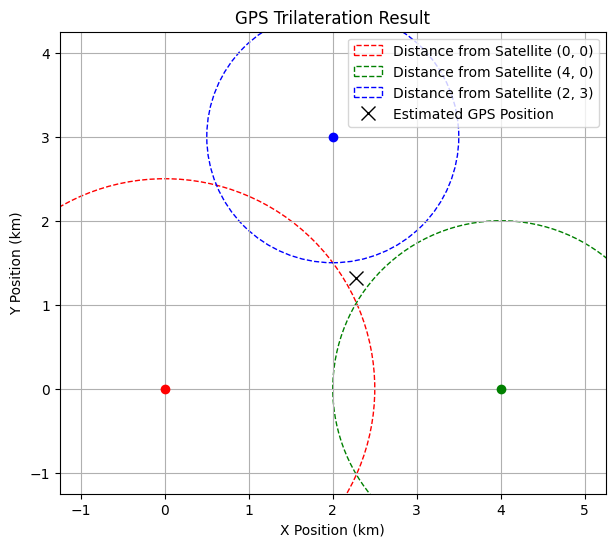

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Colab에서 그래프를 제대로 그리기 위한 설정
%matplotlib inline

def calculate_position(p1, p2, p3, d1, d2, d3):
    """
    삼변 측량법을 사용하여 GPS 수신기의 위치를 계산합니다.

    Parameters:
        p1, p2, p3: 위성의 좌표 (x, y) 튜플
        d1, d2, d3: 각 위성으로부터의 거리

    Returns:
        (x, y): 계산된 GPS 수신기의 위치 좌표
    """
    # 위성의 좌표
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    # 삼변 측량을 통한 위치 계산
    A = 2 * (x2 - x1)
    B = 2 * (y2 - y1)
    C = d1**2 - d2**2 - x1**2 + x2**2 - y1**2 + y2**2
    D = 2 * (x3 - x2)
    E = 2 * (y3 - y2)
    F = d2**2 - d3**2 - x2**2 + x3**2 - y2**2 + y3**2

    # x와 y 좌표 계산
    x = (C * E - F * B) / (E * A - B * D)
    y = (C * D - A * F) / (B * D - A * E)

    return (x, y)

def plot_gps_trilateration(p1, p2, p3, d1, d2, d3, position):
    """
    삼변 측량 결과를 시각적으로 표시합니다.

    Parameters:
        p1, p2, p3: 위성의 좌표 (x, y) 튜플
        d1, d2, d3: 각 위성으로부터의 거리
        position: 계산된 GPS 수신기의 위치 좌표
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # 위성과 거리 원 그리기
    for (px, py), d, color in zip([p1, p2, p3], [d1, d2, d3], ['r', 'g', 'b']):
        circle = plt.Circle((px, py), d, color=color, fill=False, linestyle='--', label=f'Distance from Satellite ({px}, {py})')
        ax.add_artist(circle)
        ax.plot(px, py, 'o', color=color)  # 위성 표시

    # 계산된 GPS 수신기 위치 표시
    ax.plot(position[0], position[1], 'kx', label='Estimated GPS Position', markersize=10)

    # 그래프 설정

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X Position (km)')
    ax.set_ylabel('Y Position (km)')
    ax.set_title('GPS Trilateration Result')
    ax.legend(loc='upper right')  # 범례를 우측 상단으로 이동
    ax.grid(True)

    # 범위 설정
    all_points = np.array([p1, p2, p3, position])
    buffer = max(d1, d2, d3) * 0.5
    ax.set_xlim(all_points[:, 0].min() - buffer, all_points[:, 0].max() + buffer)
    ax.set_ylim(all_points[:, 1].min() - buffer, all_points[:, 1].max() + buffer)

    plt.show()

# 위성 좌표
satellite1 = (0, 0)   # 위성 A의 좌표
satellite2 = (4, 0)   # 위성 B의 좌표
satellite3 = (2, 3)   # 위성 C의 좌표

# 수신기로부터 위성까지의 거리
distance1 = 2.5   # 위성 A에서의 거리
distance2 = 2.0   # 위성 B에서의 거리
distance3 = 1.5   # 위성 C에서의 거리

# GPS 수신기 위치 계산
gps_position = calculate_position(satellite1, satellite2, satellite3, distance1, distance2, distance3)
print(f"계산된 GPS 수신기 위치: {gps_position}")

# 그래프 그리기
plot_gps_trilateration(satellite1, satellite2, satellite3, distance1, distance2, distance3, gps_position)


### [예제] : 물방울의 궤적 계산
분수에서 물이 일정 범위 밖으로 나가지 않게 물방울 궤도 설계하는데 2차 함수 사용됨

In [ ]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def simulate_fountain_animation(num_drops=10, max_range=15, duration=20):
    """
    다양한 궤적을 가진 물방울 애니메이션을 시뮬레이션하여 보여줍니다.

    Parameters:
        num_drops (int): 물방울의 개수
        max_range (float): 그래프의 최대 범위
        duration (int): 애니메이션에서 각 프레임의 지속 시간 (ms)
    """
    g = 9.81  # 중력 가속도 (m/s^2)

    def calculate_trajectory(initial_speed, angle, g, max_range, num_points=200):
        """물방울의 궤적을 계산하는 함수"""
        vx = initial_speed * np.cos(np.radians(angle))
        vy = initial_speed * np.sin(np.radians(angle))
        time_values = np.linspace(0, 2 * initial_speed / g, num_points)
        x_values = vx * time_values
        y_values = vy * time_values - 0.5 * g * time_values**2
        valid_indices = (np.sqrt(x_values**2 + y_values**2) <= max_range) & (y_values >= 0)
        return x_values[valid_indices], y_values[valid_indices]

    # 물방울 각각의 궤적 계산 (속도와 각도를 다양하게 설정)
    np.random.seed(42)
    trajectories = [
        calculate_trajectory(
            initial_speed=np.random.uniform(8, 15),  # 8~15 m/s 속도
            angle=np.random.uniform(30, 150),  # 30~150도 각도
            g=g,
            max_range=max_range
        )
        for _ in range(num_drops)
    ]

    # 궤적 보완: 가장 긴 궤적에 맞춰 부족한 부분을 NaN으로 채움
    max_length = max(len(t[0]) for t in trajectories)
    for i in range(num_drops):
        x_values, y_values = trajectories[i]
        if len(x_values) < max_length:
            x_values = np.pad(x_values, (0, max_length - len(x_values)), mode='constant', constant_values=(np.nan,))
            y_values = np.pad(y_values, (0, max_length - len(y_values)), mode='constant', constant_values=(np.nan,))
            trajectories[i] = (x_values, y_values)

    # 애니메이션 생성
    fig = make_subplots(rows=1, cols=1)
    initial_traces = [
        go.Scatter(
            x=[trajectory[0][0]],
            y=[trajectory[1][0]],
            mode="markers",
            marker=dict(color="blue", size=10),
            name=f"Water Drop {i+1}"
        )
        for i, trajectory in enumerate(trajectories)
    ]
    for trace in initial_traces:
        fig.add_trace(trace)

    fig.update_layout(
        title="Fun Fountain Animation",
        xaxis=dict(range=[-max_range, max_range], title="X Position"),
        yaxis=dict(range=[0, max_range], title="Y Position"),
        showlegend=False,
    )

    # 애니메이션 프레임 생성
    frames = [
        go.Frame(
            data=[
                go.Scatter(
                    x=[trajectories[i][0][k]],
                    y=[trajectories[i][1][k]],
                    mode="markers",
                    marker=dict(color="blue", size=10),
                )
                for i in range(num_drops)
            ]
        )
        for k in range(max_length)
    ]
    fig.frames = frames

    # 애니메이션 제어 추가
    fig.update_layout(
        updatemenus=[
            {
                "buttons": [
                    {
                        "args": [None, dict(frame=dict(duration=duration, redraw=True), fromcurrent=True, mode="immediate")],
                        "label": "Play",
                        "method": "animate",
                    },
                    {
                        "args": [[None], dict(frame=dict(duration=0, redraw=True), mode="immediate")],
                        "label": "Pause",
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top",
            }
        ]
    )

    # 그래프 출력
    fig.show()

# 함수 실행: 코랩에서 재미난 물방울 애니메이션을 시뮬레이션
simulate_fountain_animation()




---



## 6-1. 함수의 정의

In [ ]:
def two_times(x):
    return x*2

A = {1,2,3,4,5}
B = set()
for i in A:
    B.add(two_times(i))
print(B)

{2, 4, 6, 8, 10}


### [예제 6-1]  함수의 정의
- 함수 판별:
    - A에서 B로의 관계인지를 확인
    - 두 번째로 B의 원소에 A의 원소가 단 하나만 대응되는지 확인
    - 세 번째로 A의 모든 원소가 대응 관계를 갖는 지를 확인
- 정의역, 치역, 공변역 확인

In [ ]:
def is_function(A, B, f):
    # 1. A에서 B로의 관계인지 확인 (f 순서쌍의 원소가 각 집합에 포함되었는가? )
    for x, y in f:
        if x not in A or y not in B:
            return False, set(), set(), set()

    # 2. A의 모든 원소가 단 하나의 대응만 있는지 확인
    mapping = {}
    for x, y in f:
        if x in mapping:
            # 이미 x가 다른 y와 대응되면 함수가 아님
            if mapping[x] != y:
                return False, set(), set(), set()
        else:
            mapping[x] = y

    # 3. A의 모든 원소가 대응 관계를 갖는지 확인
    if set(mapping.keys()) != A:
        return False, set(), set(), set()

    # 정의역, 공역, 치역 구하기
    domain = A
    codomain = B
    range_set = set(mapping.values())

    # 모든 조건을 만족하면 함수임
    return True, domain, codomain, range_set


# 예제 사용
A = {1, 2, 3}
B = {'a','b','c'}
f = {(1,'a'), (2,'a'), (3,'c')}

# 함수 판별하기
result = is_function(A, B, f)
print(f"f 함수판별: {result[0]}, 정의역:{result[1]} , 공역:{result[2]} , 치역:{result[3]}  ")

f 함수판별: True, 정의역:{1, 2, 3} , 공역:{'b', 'a', 'c'} , 치역:{'c', 'a'}  


### [예제 6-2]  함수의 정의
A＝{-1, 0, 1}에서 f ∶ A→A가 f(x)＝x2으로 주어졌다. 대응하는 값이 다음 그림과 같이 f(-1)＝f(1)＝1, f(0)＝0일 때 f가 함수인지 판단하고 함수라면 정의역과 치역을 구하라.

In [ ]:
def f(x):
    return x**2

A = {-1, 0, 1}
B = A
f = { (x, int(f(x))) for x in A }

result = is_function(A, B, f)  # 함수 판별하기
print(f"f 함수판별: {result[0]}, 정의역:{result[1]} , 공역:{result[2]} , 치역:{result[3]}  ")

f 함수판별: True, 정의역:{0, 1, -1} , 공역:{0, 1, -1} , 치역:{0, 1}  


### 함수 그래프 :  $f(x)=x^2$ 그래프 그리기

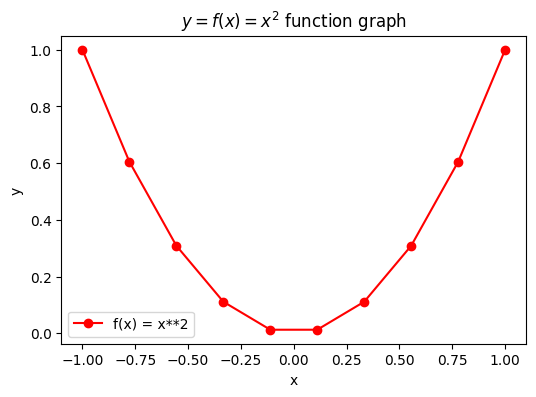

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

x = np.linspace(-1, 1, 10)  # A = {-1, 0, 1} 를 10 개의 균일한 크기로 쪼갠다.
y = f(x)
# plt.plot(x, y)
# ‘ro-’는 빨간색 (‘red’)의 원형 (‘o’) 마커와 실선(‘-’)를 의미
plt.figure(figsize=(6, 4))
plt.plot(x, y, color='red', marker='o', label="f(x) = x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$y=f(x)=x^2$ function graph")
plt.legend()

plt.show()

### 프로그램 함수
- 수학 함수와 프로그램 함수는 같은 함수이다.
- 함수를 호출할 때 **매개변수**를 넘겨주는데, 이것이 **정의역**이고 함수의 **결과를 돌려받으면** 이것이 **치역**
- 내장함수 : https://docs.python.org/ko/3.12/library/functions.html
- 사용자 정의 함수 : 사용자가 필요에 의해 직접 정의한 함수

### [예제] 사용자 정의 함수 : 슬라이드를 움직이면 원의 크기가 바뀌는 코드

In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [24]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def update_circle(radius):
    """
    주어진 반지름으로 원을 업데이트합니다.

    Parameters:
        radius (float): 원의 반지름
    """
    fig, ax = plt.subplots(figsize=(7,5))
    circle = plt.Circle((0.5, 0.5), radius, color='blue', fill=True)
    ax.add_artist(circle)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"Radius: {radius:.2f}")

    plt.show()

def main():
    """
    메인 함수로, 슬라이더와 함께 원의 반지름을 조절할 수 있도록 설정합니다.
    """
    # 슬라이더 생성 (반지름을 0.01에서 0.5까지 조절)
    radius_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Radius')

    # 슬라이더와 업데이트 함수를 연결
    interactive_plot = widgets.interactive(update_circle, radius=radius_slider)

    # 슬라이더와 그래프 표시
    display(interactive_plot)

# 메인 함수 실행
if __name__ == "__main__":
    main()

interactive(children=(FloatSlider(value=0.1, description='Radius', max=0.5, min=0.01, step=0.01), Output()), _…

------------------------------

## 6-2. 단사, 전사, 전단사 함수

1. 단사 함수 (Injective):
    - 서로 다른 입력값이 서로 다른 출력값에 대응할 때 단사 함수.
2. 전사 함수 (Surjective):
    - 공역의 모든 원소가 치역에 포함될 때 전사 함수.
3. 전단사 함수 (Bijective):
    - 함수가 단사이면서 전사일 때 전단사 함수.

In [32]:
# 함수 판별하기
def is_injective(f): # 단사 함수인지 판별
    seen_values = set()
    for _, y in f:
        if y in seen_values:  # 중복 되는 대응 관계가 있는지 확인
            return False
        seen_values.add(y)
    return True

def is_surjective(B, f): # 전사 함수인지 판별
    range_set = {y for _, y in f}  # 치역 구하기
    return range_set == B          # 치역과 공역이 같은지 확인

def is_bijective(A, B, f): # 전단사 함수인지 판별
    return is_injective(f) and is_surjective(B, f)  # 단사와 전사 여부를 둘 다 확인

In [ ]:
# 단사 함수인 경우
A = {'a', 'b'}
B = {1, 2, 3}
f = {('a', 1), ('b', 2)}

if is_function(A, B, f) : # 함수 판별하기
    print(f"f: 단사 여부={is_injective(f)}, 전사 여부={is_surjective(B, f)}, 전단사 여부={is_bijective(A, B, f)}")
else :
    print('함수가 아닙니다.')

f: 단사 여부=True, 전사 여부=False, 전단사 여부=False


In [ ]:
# 전사 함수인 경우
A = {'a', 'b', 'c'}
B = {1, 2}
f = {('a', 1), ('b', 2), ('c', 1)}

if is_function(A, B, f) : # 함수 판별하기
    print(f"f: 단사 여부={is_injective(f)}, 전사 여부={is_surjective(B, f)}, 전단사 여부={is_bijective(A, B, f)}")
else :
    print('함수가 아닙니다.')

f: 단사 여부=False, 전사 여부=True, 전단사 여부=False


In [ ]:
# 전단사 함수인 경우
A = {'a', 'b', 'c'}
B = {1, 2, 3}
f = {('a', 2), ('b', 1), ('c', 3)}

if is_function(A, B, f) : # 함수 판별하기
    print(f"f: 단사 여부={is_injective(f)}, 전사 여부={is_surjective(B, f)}, 전단사 여부={is_bijective(A, B, f)}")
else :
    print('함수가 아닙니다.')

f: 단사 여부=True, 전사 여부=True, 전단사 여부=True


### [예제 6-4] 단사함수, 전사함수, 전단사함수 판별하기
A＝{a1, a2, a3}, B＝{b1, b2, b3}, C＝{c1, c2}, D＝{d1, d2, d3, d4}라 하자. f1, f2, f3, f4를 각각 A에서 B로의 함수, A에서 D로의 함수, B에서 C로의 함수, A에서 B로의 함수라 하고 다음과 같이 정의할 때, 네 개의 함수가 단사인지, 전사인지 또는 전단사함수인지를 판단하라.


In [ ]:
A = {'a1','a2','a3'}
B = {'b1','b2','b3'}
C = {'c1','c2'}
D = {'d1','d2','d3', 'd4'}
f1 = {('a1','b2'),('a2','b3'),('a3','b1')}
f2 = {('a1','d2'),('a2','d1'),('a3','d4')}
f3 = {('b1','c2'),('b2','c2'),('b3','c1')}
f4 = {('a1','b1'),('a2','b1'),('a3','b2')}

print(f"f1: 단사 여부={is_injective(f1)}, 전사 여부={is_surjective(B, f1)}, 전단사 여부={is_bijective(A, B, f1)}")
print(f"f2: 단사 여부={is_injective(f2)}, 전사 여부={is_surjective(D, f2)}, 전단사 여부={is_bijective(A, D, f2)}")
print(f"f3: 단사 여부={is_injective(f3)}, 전사 여부={is_surjective(C, f3)}, 전단사 여부={is_bijective(B, C, f3)}")
print(f"f4: 단사 여부={is_injective(f4)}, 전사 여부={is_surjective(B, f4)}, 전단사 여부={is_bijective(A, B, f4)}")

f1: 단사 여부=True, 전사 여부=True, 전단사 여부=True
f2: 단사 여부=True, 전사 여부=False, 전단사 여부=False
f3: 단사 여부=False, 전사 여부=True, 전단사 여부=False
f4: 단사 여부=False, 전사 여부=False, 전단사 여부=False


### [참고]클래스로 구현한 함수 판별 클래스

In [36]:
class FunctionChecker:
    def __init__(self, A, B, f):
        self.A = A
        self.B = B
        self.f = f

    def is_function(self):  # 관계 f가 함수인지 판별
        mapping = {}
        for x, y in self.f:
            if x not in self.A or y not in self.B:
                return False      # 정의역과 공역에 속하지 않는 값이 있을 경우 함수가 아님
            if x in mapping:
                if mapping[x] != y:
                    return False  # 동일한 정의역 원소가 서로 다른 공역 원소와 대응되면 함수가 아님
            else:
                mapping[x] = y

        # 모든 정의역의 원소가 대응 관계를 갖는지 확인
        return set(mapping.keys()) == self.A

    def is_injective(self):  # 단사 함수인지 판별
        if not self.is_function():
            return False  # 함수가 아니면 단사도 아님

        seen_values = set()
        for _, y in self.f:
            if y in seen_values:
                return False  # 동일한 공역 원소가 두 번 이상 나타나면 단사가 아님
            seen_values.add(y)
        return True

    def is_surjective(self):  # 전사 함수인지 판별
        if not self.is_function():
            return False  # 함수가 아니면 전사도 아님

        # 치역 구하기
        range_set = {y for _, y in self.f}
        return range_set == self.B  # 치역이 공역과 같으면 전사

    def is_bijective(self):  # 전단사 함수인지 판별
        return self.is_injective() and self.is_surjective()


# 예제 사용
A = {'a1','a2','a3'}
B = {'b1','b2','b3'}
C = {'c1','c2'}
D = {'d1','d2','d3', 'd4'}
f1 = {('a1','b2'),('a2','b3'),('a3','b1')}
f2 = {('a1','d2'),('a2','d1'),('a3','d4')}
f3 = {('b1','c2'),('b2','c2'),('b3','c1')}
f4 = {('a1','b1'),('a2','b1'),('a3','b2')}

# 테스트
checker1 = FunctionChecker(A, B, f1)
checker2 = FunctionChecker(A, D, f2)
checker3 = FunctionChecker(B, C, f3)
checker4 = FunctionChecker(A, B, f4)

print(f"f1: 함수 여부={checker1.is_function()}, 단사 여부={checker1.is_injective()}, 전사 여부={checker1.is_surjective()}, 전단사 여부={checker1.is_bijective()}")
print(f"f2: 함수 여부={checker2.is_function()}, 단사 여부={checker2.is_injective()}, 전사 여부={checker2.is_surjective()}, 전단사 여부={checker2.is_bijective()}")
print(f"f3: 함수 여부={checker3.is_function()}, 단사 여부={checker3.is_injective()}, 전사 여부={checker3.is_surjective()}, 전단사 여부={checker3.is_bijective()}")
print(f"f4: 함수 여부={checker4.is_function()}, 단사 여부={checker4.is_injective()}, 전사 여부={checker4.is_surjective()}, 전단사 여부={checker4.is_bijective()}")


f1: 함수 여부=True, 단사 여부=True, 전사 여부=True, 전단사 여부=True
f2: 함수 여부=True, 단사 여부=True, 전사 여부=False, 전단사 여부=False
f3: 함수 여부=True, 단사 여부=False, 전사 여부=True, 전단사 여부=False
f4: 함수 여부=True, 단사 여부=False, 전사 여부=False, 전단사 여부=False


### 함수의 개수와 조건 (A에서  B 로 가는 함수)
|A|= m, |B| = n  
- 함수의 개수: $m^n$
- 단사 함수의 조건과 개수: $m>=n, mPn=$ $m!\over(m-n)!$
- 전사 함수의 조건과 개수: $n >= m, nPm + nCm$ x $m^{n-m}$
- 전단사 함수의 조건과 개수: $n = m$, $n!$

#### 순열(Permutations)
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑아서 나열한다.
- 뽑힌 순서대로 나열하기 때문에 순서가 의미 있다. (즉, 같은 값이 뽑히더라도 순서가 다르면 다른 경우의 수로 취급한다.)
- permutations(반복 가능한 객체, r) --> 객체에서 r개를 추출

In [ ]:
from itertools import permutations

for i in permutations([1,2,3,4], 2):
    print(i, end=" ")


(1, 2) (1, 3) (1, 4) (2, 1) (2, 3) (2, 4) (3, 1) (3, 2) (3, 4) (4, 1) (4, 2) (4, 3) 

12

#### 조합(Combinations)
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑는다.
- 순서 의미 없다.
- combinations(반복 가능한 객체, r)

In [ ]:
from itertools import combinations

for i in combinations([1,2,3,4], 2):
    print(i, end=" ")

(1, 2) (1, 3) (1, 4) (2, 3) (2, 4) (3, 4) 

### [예제 6-5]
A={1, 2, 3}이고 B={a, b, c, d}일 때 집합 A에서 집합 B로 가는 함수, 전사함수, 단사함수의 개수를 각각 구하라.

In [35]:
import math
from itertools import permutations

def count_functions(A, B):   # A에서 B로 가는 모든 함수의 개수
    return len(B) ** len(A)  # 함수의 개수: |B|^|A|


def count_injective_functions(A, B):  # 단사 함수의 개수
    if len(B) < len(A):  # 단사 함수 조건: B의 원소 수가 A의 원소 수보다 크거나 같아야 함
        return 0

    # 단사 함수의 개수: P(|B|, |A|) = |B|! / (|B| - |A|)!
    return math.perm(len(B), len(A))


def count_surjective_functions(A, B):  # 전사 함수의 개수
    n = len(A)
    m = len(B)
    if n < m:
        return 0  # 정의역의 원소가 공역의 원소보다 적으면 전사 함수가 불가능

    return math.perm(len(A), len(B)) + math.comb(len(A), len(B)) * m**(n-m)


def count_bijective_functions(A, B):  # 전단사 함수의 개수
    if len(A) != len(B):  # 전단사 함수 조건: 정의역과 공역의 원소 수가 같아야 함
        return 0

    # 전단사 함수의 개수: |A|!
    return math.factorial(len(A))

# 집합 A와 B 정의
A = {1, 2, 3}
B = {'a', 'b', 'c', 'd'}

# 함수 개수 계산
total_functions = count_functions(A, B)
injective_functions = count_injective_functions(A, B)
surjective_functions = count_surjective_functions(A, B)
bijective_functions = count_bijective_functions(A, B)

# 결과 출력
print(f"A에서 B로 가는 함수의 개수: {total_functions}")
print(f"A에서 B로 가는 단사 함수의 개수: {injective_functions}")
print(f"A에서 B로 가는 전사 함수의 개수: {surjective_functions}")
print(f"A에서 B로 가는 전단사 함수의 개수: {bijective_functions}")


A에서 B로 가는 함수의 개수: 64
A에서 B로 가는 단사 함수의 개수: 24
A에서 B로 가는 전사 함수의 개수: 0
A에서 B로 가는 전단사 함수의 개수: 0


--------------------------------

## 6-3. 역함수와 합성 함수

### 역함수(inverse function) : 전단사함수 일때 정의됨
- 함수  f의 역함수는  $ f^{-1}$ : $y=f(x)$, $x=f^{-1}(y)$  
- f가 전단사함수이면 $f^{-1}$도 전단사함수이고,  $(f^{-1})^{-1} = f$이다

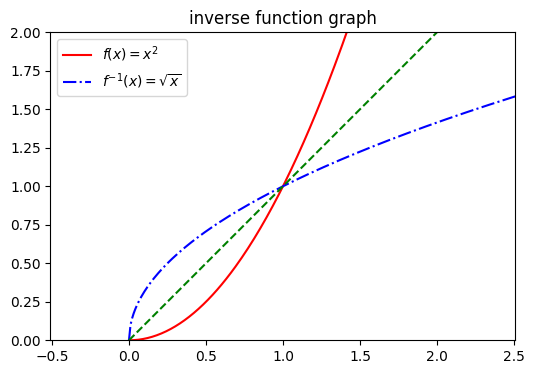

In [25]:
def f1(x):
    return x ** 2


def f1inv(x):
    return np.sqrt(x)


x = np.linspace(0, 3, 300)
plt.figure(figsize=(6, 4))
plt.plot(x, f1(x), "r-", label="$f(x) = x^2$")
plt.plot(x, f1inv(x), "b-.", label="$f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, "g--")
plt.axis("equal")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("inverse function graph")
plt.show()

### [예제6-6] 역함수가 존재하는지 판단
- A에서 B로의 관계 f가 존재할 때
- f의 역관계($f^{-1} = g$)가  B에서 A로의 함수인지 확인

In [ ]:
A = {1, 2, 3}
B = {'a','b','c'}
f = {(1,'a'), (2,'a'), (3,'c')}

# 방법1 : 전단사함수인지 확인
checker = FunctionChecker(A, B, f)
if checker.is_bijective():    #
    print('f의 역함수가 존재한다.')
else:
    print('f의  역함수가 존재하지 않는다.')



f의  역함수가 존재하지 않는다.


In [ ]:
A = {1, 2, 3}
B = {'a','b','c'}
f = {(1,'a'), (2,'a'), (3,'c')}

# 방법2 : f의 역관계 g 만들어 함수인지 확인
g = {(r[1], r[0]) for r in f}

checker = FunctionChecker(A, B, g)
if checker.is_function():
    print('f의 역함수가 존재한다.')
else:
    print('f의  역함수가 존재하지 않는다.')

f의  역함수가 존재하지 않는다.


### [예제6-6] 역함수가 존재하는지 판단

In [ ]:
A = {1, 2, 3, 4}
B = {'a','b','c', 'd'}
f = {(1,'b'), (2,'c'), (3,'a'), (4,'d')}

# 방법1 : 전단사함수인지 확인
checker = FunctionChecker(A, B, f)
if checker.is_bijective():    #
    print('f의 역함수가 존재한다.')
else:
    print('f의  역함수가 존재하지 않는다.')

f의 역함수가 존재한다.


### 합성 함수(composition function)
- 함수 $f, g가 f:X  \to Y, g: Y  \to Z$라 할 때  집합 $X에서 집합 Z$로의 함수를  $f와 g$의 합성 함수라고 하고,  $g \circ f $로 나타낸다.  

### [예제 6-9]  합성함수 구하기 : $g \circ f $ 만들기

In [ ]:
def compose_functions(f, g):
    """
    합성 함수 g ∘ f를 계산합니다.

    Parameters:
        f (list of tuple): 함수 f의 순서쌍 (X에서 Y로의 매핑)
        g (list of tuple): 함수 g의 순서쌍 (Y에서 Z로의 매핑)

    Returns:
        dict: 합성 함수 g ∘ f의 결과를 나타내는 사전
    """
    # f와 g를 사전으로 변환하여 매핑을 쉽게 접근할 수 있도록 함
    f_dict = {x: y for x, y in f}
    g_dict = {y: z for y, z in g}

    # 합성 함수 계산
    composed = {}
    for x in f_dict:
        if f_dict[x] in g_dict:
            composed[x] = g_dict[f_dict[x]]

    return set(composed.items())

# 예제 사용
X = {1, 2, 3}
Y = {'p', 'q'}
Z = {'a', 'b'}

f = [(1, 'p'), (2, 'p'), (3, 'q')]
g = [('p', 'b'), ('q', 'b')]

# 합성 함수 g ∘ f 계산
g_of_f = compose_functions(f, g)

# 결과 출력
print("합성 함수 g ∘ f:", g_of_f)


합성 함수 g ∘ f: {(3, 'b'), (1, 'b'), (2, 'b')}


### [예제 6-10]: 합성함수 구하기
두 함수 f：R→R,  g：R→R이 각각 f(x)=x2+3x, g(x)＝2x-3일 때, 합성함수 g∘f와 f∘g를 구하라.

In [ ]:
# 방법1 : 함수를 별도로 정의
def f(x):
    return x**2 + 3*x

def g(x):
    return 2*x - 3

def compose_g_of_f(x):  # 합성 함수 g ∘ f를 계산
    return g(f(x))

def compose_f_of_g(x): # 합성 함수 f ∘ g를 계산
    return f(g(x))

# 예제 사용
x = 2
print(f"g ∘ f({x}) = {compose_g_of_f(x)}")
print(f"f ∘ g({x}) = {compose_f_of_g(x)}")

g ∘ f(2) = 17
f ∘ g(2) = 4


In [ ]:
# # 방법2 : 함수 이름을 파라미터로 사용
def f(x):
    return x**2 + 3*x

def g(x):
    return 2*x - 3

def compose_func(func_list, x):
    f1 = func_list[0]
    f2 = func_list[1]
    return f2(f1(x))


x = 2
print(f"g ∘ f({x}) = {compose_func([f, g], x)}")
print(f"f ∘ g({x}) = {compose_func([g, f], x)}")

g ∘ f(2) = 17
f ∘ g(2) = 4


------------------------------------

## 6-4. 특수 함수
- 상수함수(constant function)
- 항등함수(identity function)
- 특성함수(characteristic function)
- 천장함수(ceiling function) 바닥함수(floor function)
- 해시함수(hash function)


### [예제 6-13] 두 함수가 같음(함수의 상등) : 같은 함수인지 판별하기

In [ ]:
def f(x):
    return x**2 + x*3

def g(x):
    return x**2 * 2 +  x*4


A = B = {-1, 0}
f = {f(x) for x in A}
g = {g(x) for x in A}

print(f'f: {f}, g: {g}')

if f == g:
    print('f와 g는 같은 함수이다.')
else:
    print('f와 g는 같은 함수가 아니다.')

f: {0, -2}, g: {0, -2}
f와 g는 같은 함수이다.


### [예제 6-15] 항등함수 판별하기

In [ ]:
def f(x):
    return x**3


A = {-1, 0, 1}

# 항등함수인지 판별하기
is_identity = True
for x in A:
    if f(x) != x:
        is_identity = False

if is_identity:
    print('함수 f는 항등함수이다.')
else:
    print('함수 f는 항등함수가 아니다.')

함수 f는 항등함수이다.


### [예제 6-17] 특성함수 그래프로 나타내기
집합 U＝[0, 5]과 A＝[0, 3]이 있을 때 다음은 특성함수 fA의 그래프

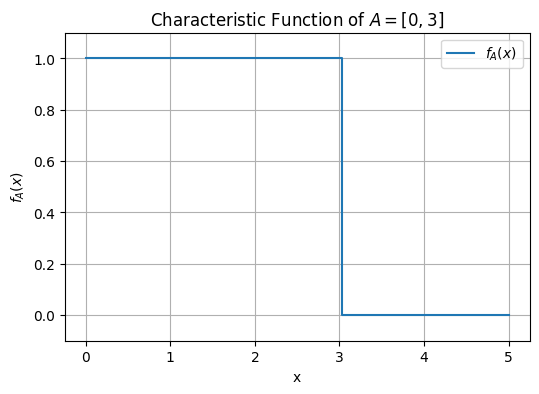

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def characteristic_function_A(x):  # 집합 A의 특성 함수를 정의
    """
    A = [0, 3]일 때, 0 <= x <= 3이면 1을, 그 외에는 0을 반환합니다.
    """
    return 1 if 0 <= x <= 3 else 0

# 집합 U = [0, 5]에서 x 값을 생성
x_values = np.linspace(0, 5, 100)
# 각 x 값에 대해 특성 함수 f_A(x) 값을 계산
y_values = [characteristic_function_A(x) for x in x_values]

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.step(x_values, y_values, where='post', label=r'$f_A(x)$')
plt.title(r'Characteristic Function of $A = [0, 3]$')
plt.xlabel('x')
plt.ylabel(r'$f_A(x)$')
plt.ylim(-0.1, 1.1)
plt.grid()
plt.legend()
plt.show()

### 천장 함수(ceiling function) & 바닥 함수(floor function)
정수형 근사값을 구하는 함수로 어떤 실수 a에 대해서 그 실수에 가장 가까운 정수 값을 구한다
<br>
-  ceil: 실수 𝑥에 대해서 𝑥보다 크거나 같은 정수 중에서 가장 작은 정수를 지정하는 함수
- floor: 실수 𝑥에 대해서 𝑥보다 작거나 같은 정수 중에서 가장 큰 정수를 지정하는 함수

### [예제 6-18] 천장함수  & 바닥함수
3.6에 대한 천장함수와 -3.6에 대한 바닥함수를 구하라. 그리고 다음을 계산하라.  ⌈2/3+⌊1/2⌋⌉

In [ ]:
import math

print( math.ceil(3.6) )
print( math.floor(-3.6) )
print(round(2/3 + round(1/2)))

4
-4
1


### 해시 함수(hash function)
- 해시 함수는 **임의의 길이를 가진 자료를 고정된 길이인 해시 값으로 변환하는 함수**이다.
- 자료를 빨리 찾을 수 있도록 하는 함수
- 해시 값은 **해시 표(hash table)**라는 자료구조에 사용됨
- 큰 파일에서 중복되는 레코드를 찾을 수 있기 때문에 데이터베이스나 표에서 매우 빠른 자료 검색을 위한 컴퓨터 소프트웨어에 널리 사용됨
- 해싱(hashing) :  해시 표를 인덱싱하기 위해 해시함수를 사용하는 것을 해싱이라 함

### [예제 6-19] 간단 해시 함수

In [ ]:
def h(x):
    return x % 7

print( h(36) )
print( h(254) )
print( h(32560) )

1
2
3


### [예제 6-20] 해시 함수의 응용

In [ ]:
def h(x):
    return x % 101

print( h(2473871) )
print( h(280) )   # 해시 충돌이 일어난다

78
78


### [참고] 해시 알고리즘 구현하기
- 크기가 8인 해시 테이블

#### 1. 해시 테이블 만들기

In [ ]:
# 크기가 8인 해시 테이블 만들기
class HashTable:
    def __init__(self):
        self.hash_table = list([0 for i in range(8)])

    def hash_function(self, key):
        return key % 8

    def insert(self, data, value):
        index_key = hash(data)
        hash_addr = self.hash_function(index_key)
        self.hash_table[hash_addr] = value

    def read(self, data):
        index_key = hash(data)
        hash_addr = self.hash_function(index_key)
        return self.hash_table[hash_addr]

    def print(self):
        print(self.hash_table)


In [ ]:
ht = HashTable()

ht.insert(1, 'a')          # key값(1), value('a') 추가
ht.print()
ht.insert('name', 'cho')   # key값('name'), value('a') 추가
ht.print()
ht.insert(2, 'b')          # key값(2), value('b') 추가
ht.print()
ht.insert(7, 'd')          # key값(7), value('d') 추가
ht.print()
print(ht.read(2))


# 키 값 충돌 발생
ht.insert(15, 'kim')          # key값(15), value('kim') 추가
ht.print()

[0, 'a', 0, 0, 0, 0, 0, 0]
[0, 'a', 0, 'cho', 0, 0, 0, 0]
[0, 'a', 'b', 'cho', 0, 0, 0, 0]
[0, 'a', 'b', 'cho', 0, 0, 0, 'd']
b
[0, 'a', 'b', 'cho', 0, 0, 0, 'kim']


- **개방 주소법 (Open Addressing) - 선형 탐사 (Linear Probing)** : 해당 hash value(hash address)의 다음 index부터 맨 처음 나오는 빈공간에 저장하는 기법

In [ ]:
class HashTableLinearProbing:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def hash_function(self, key):
        # 해시 함수: 키를 테이블 크기로 나눈 나머지
        return key % self.size

    def insert(self, key, value):
        # 해시 값을 계산
        index = self.hash_function(key)

        # 충돌이 발생하면 다음 슬롯을 탐색
        while self.table[index] is not None:
            # 이미 같은 키가 존재하면 값을 업데이트
            if self.table[index][0] == key:
                self.table[index] = (key, value)
                return
            # 선형 탐사로 다음 슬롯 탐색
            index = (index + 1) % self.size

        # 빈 슬롯에 (key, value) 삽입
        self.table[index] = (key, value)

    def search(self, key):
        # 해시 값을 계산
        index = self.hash_function(key)

        # 키를 탐색
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]  # 값을 반환
            index = (index + 1) % self.size

        # 키가 없으면 None 반환
        return None

    def display(self):
        # 해시 테이블의 내용을 출력
        for i, item in enumerate(self.table):
            print(f"Index {i}: {item}")

# 예제 사용
hash_table = HashTableLinearProbing(10)
hash_table.insert(5, "apple")
hash_table.insert(15, "banana")
hash_table.insert(25, "cherry")
hash_table.insert(35, "date")

hash_table.display()

print("검색 결과:", hash_table.search(15))
print("검색 결과:", hash_table.search(25))


Index 0: None
Index 1: None
Index 2: None
Index 3: None
Index 4: None
Index 5: (5, 'apple')
Index 6: (15, 'banana')
Index 7: (25, 'cherry')
Index 8: (35, 'date')
Index 9: None
검색 결과: banana
검색 결과: cherry


#### 2. 충돌 해결하기 : Chaining
- **Chaining** : linked list로 데이터를 추가로 뒤에 연결시키는 방법

In [ ]:
class HashTableChaining:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def hash_function(self, key):
        # 해시 함수: 키를 테이블 크기로 나눈 나머지
        return key % self.size

    def insert(self, key, value):
        # 해시 값을 계산
        index = self.hash_function(key)

        # 체이닝 방식으로 리스트에 (key, value) 추가
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                # 이미 같은 키가 존재하면 값을 업데이트
                self.table[index][i] = (key, value)
                return

        # 리스트에 새 항목 추가
        self.table[index].append((key, value))

    def search(self, key):
        # 해시 값을 계산
        index = self.hash_function(key)

        # 체이닝된 리스트에서 키를 탐색
        for k, v in self.table[index]:
            if k == key:
                return v  # 값을 반환

        # 키가 없으면 None 반환
        return None

    def display(self):
        # 해시 테이블의 내용을 출력
        for i, items in enumerate(self.table):
            print(f"Index {i}: {items}")

# 예제 사용
hash_table = HashTableChaining(10)
hash_table.insert(5, "apple")
hash_table.insert(15, "banana")
hash_table.insert(25, "cherry")
hash_table.insert(35, "date")

hash_table.display()

print("검색 결과:", hash_table.search(15))
print("검색 결과:", hash_table.search(25))


Index 0: []
Index 1: []
Index 2: []
Index 3: []
Index 4: []
Index 5: [(5, 'apple'), (15, 'banana'), (25, 'cherry'), (35, 'date')]
Index 6: []
Index 7: []
Index 8: []
Index 9: []
검색 결과: banana
검색 결과: cherry


#### 문자열 해싱
 - SHA-1:   SHA-1은 해쉬값의 크기를 160으로 고정하는 알고리즘
 - SHA-256: SHA-256은 해쉬값의 크기를 256으로 고정하는 알고리즘

In [ ]:
import hashlib

def hash_sha1(data):
    hash_object = hashlib.sha1()
    hash_object.update(data)
    hex_dig = hash_object.hexdigest()
    print(hex_dig)

def hash_sha256(data):
    hash_object = hashlib.sha256()
    hash_object.update(data)
    hex_dig = hash_object.hexdigest()
    print(hex_dig)

test1 = 'test'.encode()
test2 = 'hello world'.encode()
hash_sha1( test1 )
hash_sha1( test2 )
hash_sha256( test1 )
hash_sha256( test2 )

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3
2aae6c35c94fcfb415dbe95f408b9ce91ee846ed
9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08
b94d27b9934d3e08a52e52d7da7dabfac484efe37a5380ee9088f7ace2efcde9


---------------------------------------------

## 5. 응용 : 순열

### 순열(Permutations)
- 순열은 어떤 집합 A에서 A로 가는 전단사함수이다.
- 참고: https://docs.python.org/ko/3/library/itertools.html
- 반복 가능한 객체(=길이가 n인)에 대해서 중복을 허용하지 않고 r개를 뽑아서 나열한다.
- 뽑힌 순서대로 나열하기 때문에 순서가 의미 있다. (즉, 같은 값이 뽑히더라도 순서가 다르면 다른 경우의 수로 취급한다.)
- permutations(반복 가능한 객체, r) --> 객체에서 r개를 추출

### [예제 6-22] 순열 표현하기
A＝{1, 2, 3}이라 하자. A의 순열들을 구하라.

In [40]:
from itertools import permutations

A = {1,2,3}
P = permutations(A)
print( list(P) )

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


In [42]:
A = {'1','2','3'}
print( list(map(''.join, permutations(A))) )

['132', '123', '312', '321', '213', '231']


In [43]:
# 전단사함수의 개수
count_bijective_functions(A, A)

6

### [예제 6-23] : 순열 곱(product):두 개의 순열에 대한 합성
A＝{1, 2, 3}이라 하자. A의 순열들을 구하고 이 순열을 사용해서 순열의 곱 p2ㆍp3, p3ㆍp2, p4ㆍp5를 계산하라.

In [106]:
from itertools import permutations

def compose_permutations(p1, p2):
    """두 순열 p1과 p2의 곱을 계산하는 함수"""
    # 먼저 p2를 적용한 후 그 결과에 p1을 적용
    return tuple(p1[p2[i] - 1] for i in range(len(p1)))


# 집합 A의 순열들 구하기
A = {1, 2, 3}
perm_list = list(permutations(list(A)))

# 순열들 출력
print("A의 순열들:")
for i, perm in enumerate(perm_list):
    print(f"p{i+1} = {perm}")

# 순열의 곱 계산
p3_p4 = compose_permutations(perm_list[2], perm_list[3])  # p3 * p4
p4_p3 = compose_permutations(perm_list[3], perm_list[2])  # p4 * p3
p5_p6 = compose_permutations(perm_list[4], perm_list[5])  # p5 * p6


# 결과 출력
print("\n순열의 곱:")
print(f"p3 * p4 = {perm_list[2]}∘{perm_list[3]} = {p3_p4}")
print(f"p4 * p3 = {perm_list[3]}∘{perm_list[2]} = {p4_p3}")
print(f"p5 * p6 = {perm_list[4]}∘{perm_list[5]} = {p5_p6}")

A의 순열들:
p1 = (1, 2, 3)
p2 = (1, 3, 2)
p3 = (2, 1, 3)
p4 = (2, 3, 1)
p5 = (3, 1, 2)
p6 = (3, 2, 1)

순열의 곱:
p3 * p4 = (2, 1, 3)∘(2, 3, 1) = (1, 3, 2)
p4 * p3 = (2, 3, 1)∘(2, 1, 3) = (3, 2, 1)
p5 * p6 = (3, 1, 2)∘(3, 2, 1) = (2, 1, 3)


###[예제 6-24] 순환적 순열(Cycle permutation)
A = {1, 2, 3, 4, 5}일 때 순환적 순열 (1, 3, 5)에 대해 순열 p로 표현하라.
<br>
- 순환적 순열 (1,3,5)은 1을 3으로, 3을 5로, 5를 1로 매핑하는 순열임. 나머지 원소들은 자신에게 매핑
- 길이가 r(순환적 순열의 개수)인 순환


In [103]:
# 방법1 : 순서쌍을 이용한 순열
def create_permutation_from_cycle(A, C):
    P = []
    for a in list(A):  # 순서쌍 만들기
        if a in C:
            if C.index(a) == len(C)-1:   # 순환적 순열의 마지막 요소
                P.append( (a, C[0]) )    # 순서쌍 추가
            else:
                P.append( (a, C[C.index(a)+1]) ) # 다음 순서
        else:
            P.append( (a, a) )

    print('순서쌍 P : ', P)

    return tuple(b for a, b in P)  # 순열

# 순열 p 생성
A = {1,2,3,4,5}
cycle = (1,3,5) # 순환적 순열
p = create_permutation_from_cycle(A, cycle)

# 결과 출력
print(f"집합 A={A}일 때, 순환적 순열 {cycle}의 순열 p: {p}")

순서쌍 P :  [(1, 3), (2, 2), (3, 5), (4, 4), (5, 1)]
집합 A={1, 2, 3, 4, 5}일 때, 순환적 순열 (1, 3, 5)의 순열 p: (3, 2, 5, 4, 1)


In [104]:
# 방법2 :  순환적 순열 직접 적용
def create_permutation_from_cycle(cycle, elements):
    """주어진 순환적 순열과 집합 elements에 대해 순열을 생성."""
    # 초기 순열을 항등 순열로 설정
    permutation = list(elements)

    # 순환적 순열을 적용
    for i in range(len(cycle)):
        current_index = elements.index(cycle[i])
        next_element = cycle[(i + 1) % len(cycle)]
        permutation[current_index] = next_element

    return tuple(permutation)


# 순열 p 생성
A = {1, 2, 3, 4, 5}
cycle = (1, 3, 5)
p = create_permutation_from_cycle(cycle, list(A))

# 결과 출력
print(f"집합 A={A}일 때, 순환적 순열 {cycle}의 순열 p: {p}")

집합 A={1, 2, 3, 4, 5}일 때, 순환적 순열 (1, 3, 5)의 순열 p: (3, 2, 5, 4, 1)


### [예제 6-25] 순환적 순열 구하고 순열곱 구하기
A＝{1, 2, 3, 4, 5, 6}일 때 두 개의 순환적 순열의 곱 (1, 2, 3, 5)ㆍ(5, 6, 4)와 (5, 6, 4)ㆍ(1, 2, 3, 5)를 계산하라.    

In [108]:
# 집합 A와 순환적 순열
A = {1, 2, 3, 4, 5, 6}
cycle1 = (1, 2, 3, 5)
cycle2 = (5, 6, 4)

# 순열 p 생성
p1 = create_permutation_from_cycle(cycle1, list(A))
p2 = create_permutation_from_cycle(cycle2, list(A))

# 순열의 곱 계산
p1_p2= compose_permutations(p1, p2)  # (1, 2, 3, 5) * (5, 6, 4)
p2_p1= compose_permutations(p2, p1)  # (5, 6, 4) * (1, 2, 3, 5)

# 결과 출력
print(f"{cycle1} ∘ {cycle2} = {p1} ∘ {p2} = {p1_p2}")
print(f"{cycle2} ∘ {cycle1} = {p2} ∘ {p1} = {p2_p1}")

(1, 2, 3, 5) ∘ (5, 6, 4) = (2, 3, 5, 4, 1, 6) ∘ (1, 2, 3, 5, 6, 4) = (2, 3, 5, 1, 6, 4)
(5, 6, 4) ∘ (1, 2, 3, 5) = (1, 2, 3, 5, 6, 4) ∘ (2, 3, 5, 4, 1, 6) = (2, 3, 6, 5, 1, 4)


-------------------------

THE END